In [122]:
%load_ext autoreload
%autoreload 2

import NLTE.NLTE_model
import matplotlib.pyplot as plt
import numpy as np
from astropy.modeling.physical_models import BlackBody
import astropy.units as u
import astropy.constants as const


environments = [NLTE.NLTE_model.Environment(T_phot= 4400, photosphere_velocity= 0.245, line_velocity= 0.245, t_d=1.43),
                NLTE.NLTE_model.Environment(T_phot= 2750, photosphere_velocity= 0.190, line_velocity= 0.190, t_d=3.41)]

                
#My plot style to standardize my plot esthetics
def reset_plt(ticksize,fontsize):
    #plt.style.use('seaborn-white')
    plt.rcParams['xtick.labelsize'] = ticksize
    plt.rcParams['ytick.labelsize'] = ticksize
    plt.rcParams['font.size'] = fontsize
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['legend.facecolor'] = 'white'
    plt.rcParams['axes.formatter.limits'] = (-1,3)
    plt.rcParams['axes.linewidth'] = 2.25
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.6
    #plt.rcParams['pcolor.shading'] = 'nearest'
    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[<NLTE.NLTE_model.CollisionProcess object at 0x7f4bba69c7c0>, <NLTE.NLTE_model.RadiativeProcess object at 0x7f4bba54ce80>, <NLTE.NLTE_model.RecombinationProcess object at 0x7f4bbab16dd0>, <NLTE.NLTE_model.HotElectronIonizationProcess object at 0x7f4bba69c8b0>]
[<NLTE.NLTE_model.CollisionProcess object at 0x7f4bbac9b520>, <NLTE.NLTE_model.RadiativeProcess object at 0x7f4bba790bb0>, <NLTE.NLTE_model.RecombinationProcess object at 0x7f4bba7118d0>, <NLTE.NLTE_model.HotElectronIonizationProcess object at 0x7f4bba710220>]


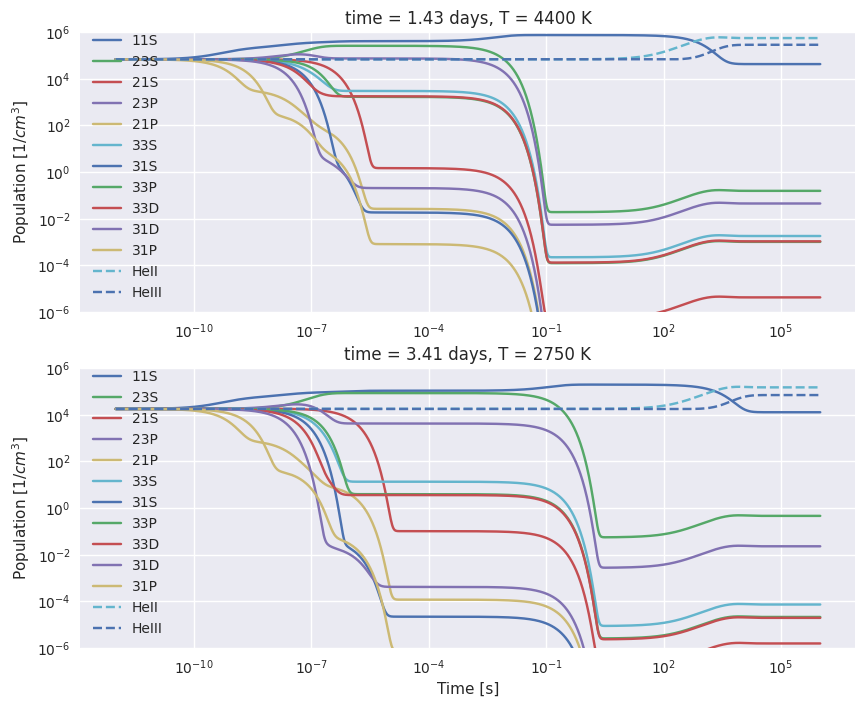

In [3]:
fig, axes = plt.subplots(2, 1, figsize=(10,8))
states = NLTE.NLTE_model.States()
for environment, ax in zip(environments, axes):
    nlte_solver = NLTE.NLTE_model.NLTESolver(environment)
    nlte_solver.processes = nlte_solver.processes[:2] + nlte_solver.processes[3:]
    print(nlte_solver.processes)
    t, y = nlte_solver.solve(np.geomspace(1e-12,1000000, 1000))
    ax.plot(t, y.T[:, :-2], label = states.names);
    ax.plot(t, y.T[:, -2:], linestyle="--", label  = ["HeII", "HeIII"]);
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_ylabel(r"Population $[1/cm^3]$")
    ax.set_ylim(1e-6, 1e6)
    ax.legend(loc="lower left")
    ax.set_title(f"time = {environment.t_d} days, T = {environment.T_phot} K")
    #for name, amount in zip(states.names + ["HeII", "HeIII"], y.T[-1]):
    #    print(name, amount)
ax.set_xlabel("Time [s]")
plt.savefig("plots/time_evolution.png", dpi=300, bbox_inches="tight")

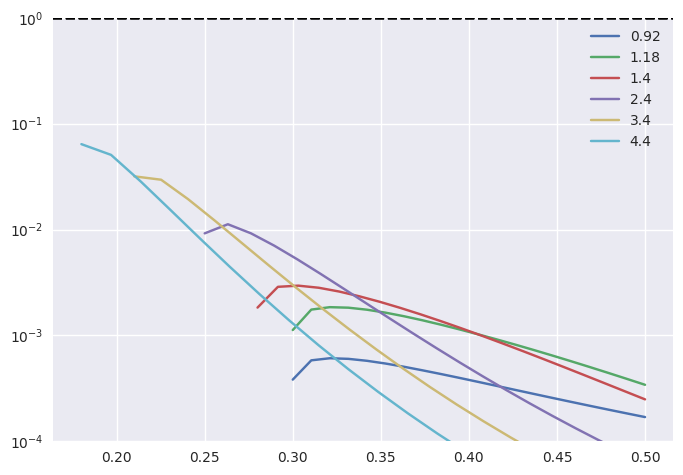

In [13]:

parameters = [{"T_phot": 5400, "photosphere_velocity": 0.3, "t_d": 0.92},
              {"T_phot": 4400, "photosphere_velocity": 0.3, "t_d": 1.18},
              {"T_phot": 4200, "photosphere_velocity": 0.28, "t_d": 1.4},
              {"T_phot": 3300, "photosphere_velocity": 0.25, "t_d": 2.4},
              {"T_phot": 3000, "photosphere_velocity": 0.21, "t_d": 3.4},
              {"T_phot": 2900, "photosphere_velocity": 0.18, "t_d": 4.4},
              ]
density_table = []
for params in parameters:
    velocities = np.linspace(params["photosphere_velocity"], 0.5, 20)
    densities = []
    for v in velocities:
        environment  = NLTE.NLTE_model.Environment(**params, line_velocity= v)
        nlte_solver = NLTE.NLTE_model.NLTESolver(environment)
        densities.append(nlte_solver.solve(1e7)[1][:, -1])
    density_table.append(np.array(densities))
    densities = np.array(densities)
    plt.plot(velocities, densities[:,1]/(7.4*params["t_d"]**-1), label = params["t_d"]);
    plt.yscale("log")
    plt.axhline(1, linestyle="--", color="black")
    #plt.xscale("log")
    plt.ylim(1e-4, 1e0)
    plt.legend()
    plt.grid()
    #for name, amount in zip(states.names + ["HeII", "HeIII"], y.T[-1]):
    #    print(name, amount)

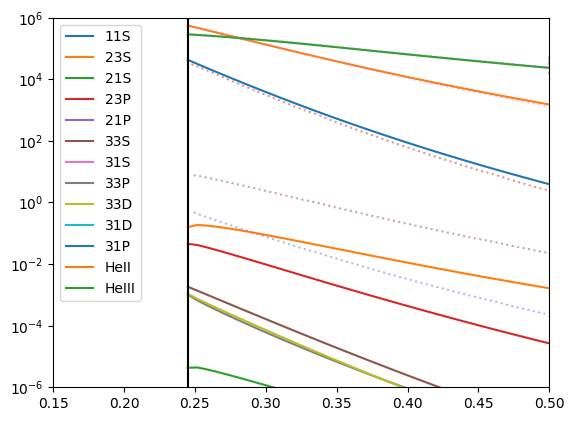

In [6]:
states = NLTE.NLTE_model.States()
velocities = np.linspace(0.245, 0.5, 40)
densities = []
for v in velocities:
    environment  = NLTE.NLTE_model.Environment(T_phot= 4400, photosphere_velocity= 0.245, line_velocity= v, t_d=1.43)
    nlte_solver = NLTE.NLTE_model.NLTESolver(environment)
    nlte_solver.processes = nlte_solver.processes[:2] + nlte_solver.processes[3:]
    densities.append(nlte_solver.solve(1e7)[1][:, -1])

    
for name, amount in zip(states.all_names, np.array(densities).T):
    plt.plot(velocities, amount, label=name)
plt.yscale("log")
plt.legend()
plt.ylim(1e-6, 1e6)


tarumi_states = ["11S", "23P", "23S", "He+", "He2+"]
for name in tarumi_states:
    velocity_23S, pops_23S = np.loadtxt(f"Tarumi_densities/Early{name}.csv", unpack=True, delimiter=";")
    plt.plot(velocity_23S, pops_23S, label=name, alpha=0.5, linestyle=":")
plt.xlim(0.15, 0.5)
plt.axvline(0.245, linestyle="-", color="black")

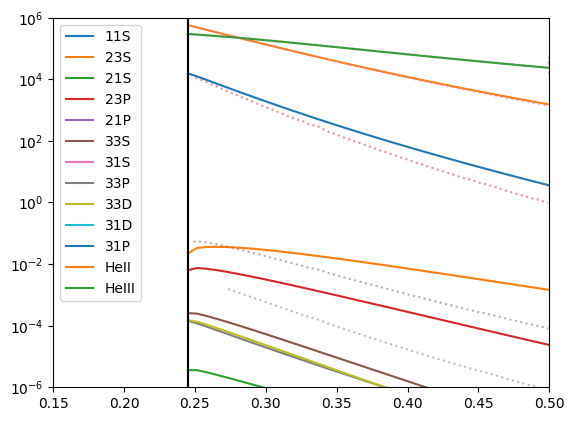

In [7]:
states = NLTE.NLTE_model.States()
velocities = np.linspace(0.245, 0.5, 40)
densities = []
for v in velocities:
    environment  = NLTE.NLTE_model.Environment(T_phot= 4400, photosphere_velocity= 0.245, line_velocity= v, t_d=1.43)
    nlte_solver = NLTE.NLTE_model.NLTESolver(environment)
    densities.append(nlte_solver.solve(1e7)[1][:, -1])

    
for name, amount in zip(states.all_names, np.array(densities).T):
    plt.plot(velocities, amount, label=name)
plt.yscale("log")
plt.legend()
plt.ylim(1e-6, 1e6)


tarumi_states = ["11Swithout", "23Pwithout", "23Swithout", "He+", "He2+"]
for name in tarumi_states:
    velocity_23S, pops_23S = np.loadtxt(f"Tarumi_densities/Early{name}.csv", unpack=True, delimiter=";")
    plt.plot(velocity_23S, pops_23S, label=name, alpha=0.5, linestyle=":")
plt.xlim(0.15, 0.5)
plt.axvline(0.245, linestyle="-", color="black")

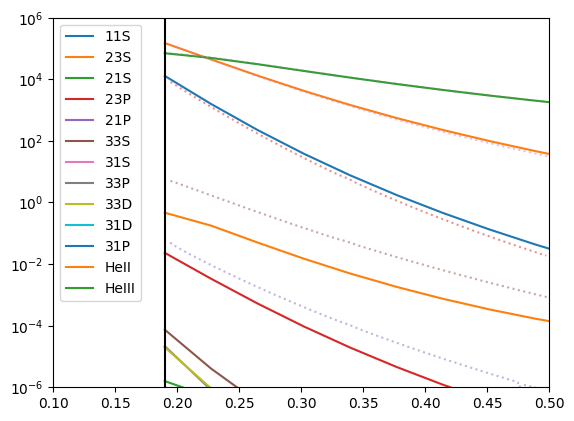

In [8]:
states = NLTE.NLTE_model.States()
velocities = np.linspace(0.19, 0.9, 20)
densities = []
for v in velocities:
    #states = NLTE.NLTE_model.States().filter(["11S", "23S", "21S", "23P", "21P", "33S"])
    environment  = NLTE.NLTE_model.Environment(T_phot= 2750, photosphere_velocity= 0.19, line_velocity= v, t_d= 3.41)
    nlte_solver = NLTE.NLTE_model.NLTESolver(environment)#, states=states)
    nlte_solver.processes = nlte_solver.processes[:2] + nlte_solver.processes[3:]
    densities.append(nlte_solver.solve(1e7)[1][:, -1])

for name, amount in zip(states.all_names, np.array(densities).T):
    plt.plot(velocities, amount, label=name)
plt.yscale("log")
plt.legend()
plt.ylim(1e-6, 1e6)

tarumi_states = ["11S", "23P", "23S", "He+", "He2+"]
for name in tarumi_states:
    velocity_23S, pops_23S = np.loadtxt(f"Tarumi_densities/late{name}.csv", unpack=True, delimiter=";")
    plt.plot(velocity_23S, pops_23S, label=name, alpha=0.5, linestyle=":")
plt.xlim(0.1, 0.5)
plt.axvline(0.19, linestyle="-", color="black")

[<NLTE.NLTE_model.CollisionProcess object at 0x7fe6550ceb60>, <NLTE.NLTE_model.RadiativeProcess object at 0x7fe6550d85e0>, <NLTE.NLTE_model.PhotoionizationProcess object at 0x7fe6550cd1e0>, <NLTE.NLTE_model.RecombinationProcess object at 0x7fe6550b8c40>, <NLTE.NLTE_model.HotElectronIonizationProcess object at 0x7fe6550bbdc0>]
[<NLTE.NLTE_model.CollisionProcess object at 0x7fe6552b4ee0>, <NLTE.NLTE_model.RadiativeProcess object at 0x7fe655208b80>, <NLTE.NLTE_model.PhotoionizationProcess object at 0x7fe6550b9d20>, <NLTE.NLTE_model.RecombinationProcess object at 0x7fe6550bb100>, <NLTE.NLTE_model.HotElectronIonizationProcess object at 0x7fe6552087f0>]


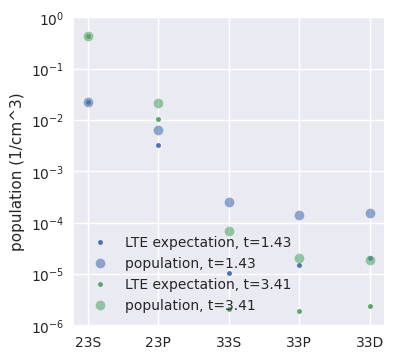

In [109]:

fig, ax1 = plt.subplots(1,1, figsize=(4,4))
for i, environment in enumerate(environments):
    nlte_solver = NLTE.NLTE_model.NLTESolver( environment)
    nlte_solver.processes = nlte_solver.processes
    t, y = nlte_solver.solve(1e6)
    print(nlte_solver.processes)
    ortho_filter = np.array([x[1] == "3" for x in nlte_solver.states.all_names])
    names = np.array(nlte_solver.states.all_names)[ortho_filter]
    ax1_left  = ax1
    p_i = nlte_solver.states.multiplicities * np.exp(-nlte_solver.states.energies / (const.k_B * nlte_solver.environment.T_electrons*u.K))
    p_i = p_i * y[1, -1] / p_i[1]
    ax1_left.plot(names,  p_i[ortho_filter[:-2]], ".", alpha=1, label=f"LTE expectation, t={environment.t_d}", color=f"C{i}")
    ax1_left.semilogy(names, y[ortho_filter, -1], "o", alpha=0.6, label=f"population, t={environment.t_d}", color=f"C{i}")
    ax1_left.legend(loc="lower left")
    ax1_left.set_ylim(1e-6, 1e0)
    ax1_left.set_ylabel("population (1/cm^3)")
plt.savefig("plots/ortho_population.png", dpi=300, bbox_inches="tight")


Max flux:
Radiative                : 23S  -> 23P . Flux: 7.29e+04
Radiative                : 23P  -> 23S . Flux: 7.18e+04
Radiative                : 33D  -> 23P . Flux: 5.15e+03
Radiative                : 23P  -> 33D . Flux: 5.15e+03
Max fluxes out of ortho:
Photoionization          : 33P  -> HeII. Flux: 1.12e+01
Photoionization          : 33D  -> HeII. Flux: 6.81e+00
Photoionization          : 23P  -> HeII. Flux: 6.66e+00
Photoionization          : 33S  -> HeII. Flux: 4.40e+00
Radiative                : 33D  -> 21P . Flux: 2.31e+00
Radiative                : 23P  -> 31D . Flux: 1.12e+00
Photoionization          : 23S  -> HeII. Flux: 7.63e-01
Radiative                : 23P  -> 11S . Flux: 5.61e-01
Collision                : 23S  -> 21S . Flux: 2.66e-01
Collision                : 23P  -> 21P . Flux: 1.70e-01
Collision                : 23P  -> 21S . Flux: 1.43e-01
Collision                : 33S  -> 31S . Flux: 2.63e-02
Collision                : 33S  -> 21P . Flux: 1.67e-02
Collision    

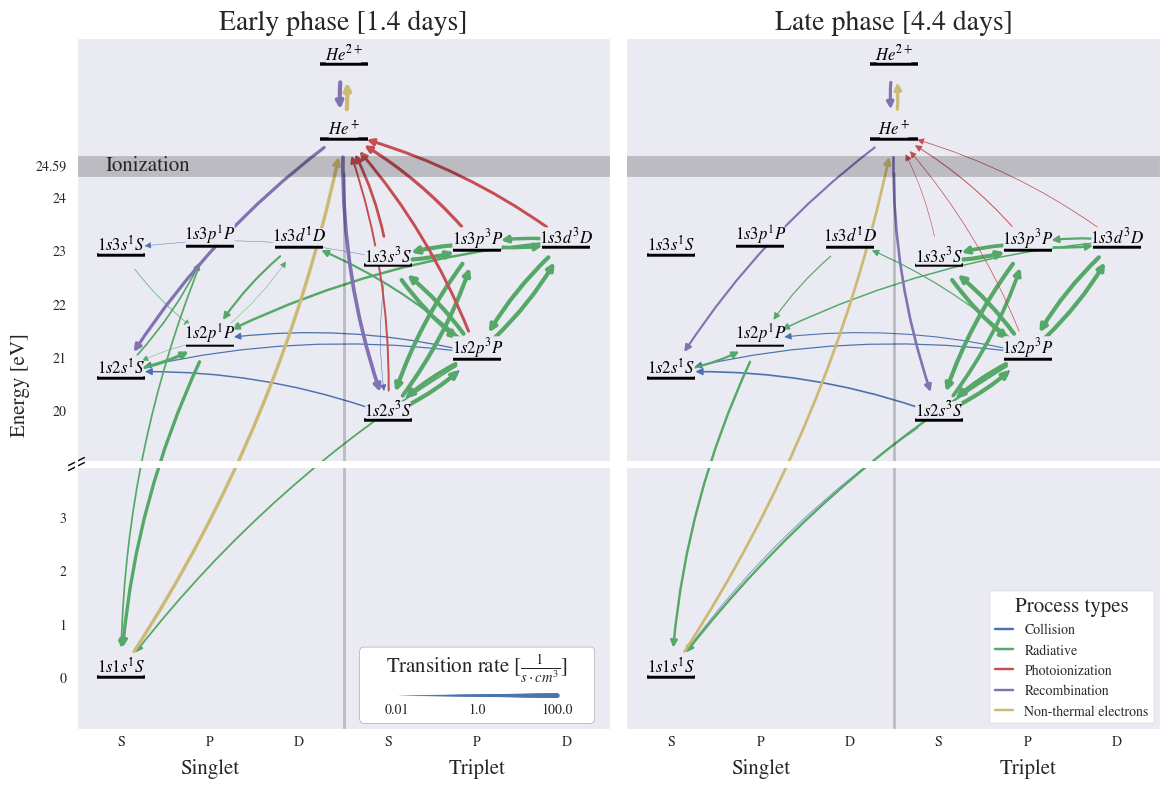

In [194]:
import networkx as nx
import NLTE.NLTE_model
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator


import networkx as nx
import NLTE.NLTE_model
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.style.use('seaborn-v0_8')


#My plot style to standardize my plot esthetics
def reset_plt(ticksize,fontsize, titlesize=None):
    if titlesize is None:
        titlesize = fontsize
    #plt.style.use('seaborn-white')
    plt.rcParams['xtick.labelsize'] = ticksize
    plt.rcParams['ytick.labelsize'] = ticksize
    plt.rcParams['font.size'] = fontsize
    plt.rcParams['axes.labelsize'] = fontsize
    plt.rcParams['axes.titlesize'] = titlesize
    plt.rcParams['legend.fontsize'] = ticksize
    plt.rcParams['legend.title_fontsize'] = fontsize
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['legend.facecolor'] = 'white'
    plt.rcParams['axes.formatter.limits'] = (-1,3)
    plt.rcParams['axes.linewidth'] = 2.25
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.6
    plt.rcParams['figure.facecolor'] = 'white'
    #plt.rcParams['pcolor.shading'] = 'nearest'
    
reset_plt(10,15, 20)

print_count = 15

# A_{i,j} = rate to state i from state j 
#environments  = [NLTE.NLTE_model.Environment(T_phot= 4400, photosphere_velocity= 0.245, line_velocity= 0.245, t_d=1.43),
#                 NLTE.NLTE_model.Environment(T_phot= 2900, photosphere_velocity= 0.19, line_velocity=  0.19, t_d=4.43)]
fig, axes = plt.subplots(1, 2, sharey="row", figsize=(14,9), facecolor="white")
plt.subplots_adjust( wspace=0.03)
min_rate = 0.01
max_rate = 1e2
max_width = 3

for environment, ax, title in zip(environments, axes, ["Early phase [1.4 days]", "Late phase [4.4 days]"]):
        #plt.figure(figsize=(8,6))
        # make subplots with the second one being taller
        #fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8,6), gridspec_kw={'height_ratios': [1, 2.5, 1.5]})
        nlte_solver = NLTE.NLTE_model.NLTESolver(environment)
        nlte_solver.processes = nlte_solver.processes
        t, y = nlte_solver.solve(1e6)
        all_fluxes = [(process.get_transition_rate_matrix() * y.T[-1][None,:]) for process in nlte_solver.processes]
        all_fluxes = np.array(all_fluxes)#[:,~ortho_filter][:,:, ortho_filter]
        max_index = np.unravel_index(np.argsort(-all_fluxes, axis=None), all_fluxes.shape)
        i = 0
        print("Max flux:")
        ortho_filter = np.array([x[1] == "3" for x in nlte_solver.states.all_names])

        for process_idx, destination_idx, origin_idx in list(zip(*max_index)):
                #if states.all_names[origin_idx] in ["23S", "23P"] and not ortho_filter[destination_idx]:
                print(f"{nlte_solver.processes[process_idx].name:25s}: {states.all_names[origin_idx]:4} -> {states.all_names[destination_idx]:4}. Flux: {all_fluxes[process_idx, destination_idx, origin_idx]:.2e}")
                i += 1
                if i > 3:
                        break
        i = 0
        print("Max fluxes out of ortho:")
        for process_idx, destination_idx, origin_idx in list(zip(*max_index)):
                #if states.all_names[origin_idx] in ["23S", "23P"] and not ortho_filter[destination_idx]:
                if ortho_filter[origin_idx] and not ortho_filter[destination_idx]:
                        i += 1
                        if i > print_count:
                                break
                        print(f"{nlte_solver.processes[process_idx].name:25s}: {states.all_names[origin_idx]:4} -> {states.all_names[destination_idx]:4}. Flux: {all_fluxes[process_idx, destination_idx, origin_idx]:.2e}")

        for i, process in enumerate(nlte_solver.processes):
                process_fluxes = (process.get_transition_rate_matrix() * y.T[-1][None,:]).T

                # give nodes the names states.names + ["HeII", "HeIII"]
                order= [0,2,4,6,9, 10,1, 3, 5, 7, 8, 11, 12]
                #order = np.arange(len(states.names) + 2)
                widths = np.interp(np.log10(np.maximum(process_fluxes, min_rate)), np.log10([min_rate, max_rate]), [0, max_width])
                widths = widths * (widths >= 0.3)
                        #np.log10([min_rate, max_rate]), [0, max_width], np.log10(process_fluxes)
                #widths = np.clip(np.log10(process_fluxes/max_flux)+dynamic_range, 0, 10)/dynamic_range*3
                #widths = np.clip(process_fluxes/max_flux * 5, 0, 10)
                G = nx.DiGraph(widths)
                # rename nodes:
                labels = {i:name for i, name in enumerate(np.array(nlte_solver.states.all_names))}
                G = nx.relabel_nodes(G, labels)
                weights = nx.get_edge_attributes(G,'weight').values()
                x_pos = {"11S": 0,  "21S": 0,   "31S": 0,
                                    "21P": 1,   "31P": 1, 
                                                "31D": 2, 
                                    "23S": 3,   "33S": 3,
                                    "23P": 4,   "33P": 4, 
                                                "33D": 5, 
                       }
                final_pos = {name: (x_pos[name], energy.value) for name, energy in zip(nlte_solver.states.all_names, nlte_solver.states.energies)} 
                final_pos["HeII"] = (2.5, 25.1) # add HeII and HeIII
                final_pos["HeIII"] = (2.5, 26.5)
                final_pos["11S"] = 0, 15      # modify 11S
                labels = {name: f"$1s{name[0]}{name[2].lower()}^{name[1]}{name[2]}$" for name in nlte_solver.states.names}
                labels["HeII"] = "$He^+$"
                labels["HeIII"] = "$He^{2+}$"
                #pos = nx.circular_layout(G)
                #nx.draw(G, final_pos, ax=ax,
                #        width=list(weights), edge_color=f'C{i}' ,connectionstyle="arc3,rad=0.1",
                #        with_labels=True, labels=labels, 
                #        node_color='k', node_shape="_", node_size=1200, font_size=10, font_weight="light", 
                #        verticalalignment="bottom", 
                #        bbox=dict(facecolor=ax.get_facecolor(), edgecolor = ax.get_facecolor(), boxstyle='square,pad=-0.1'))
                nx.draw_networkx_edges(G, {name: np.array([0,0.1])+final_pos[name] for name in final_pos}, ax=ax, width=list(weights), edge_color=f'C{i}', node_size=1200 ,connectionstyle="arc3,rad=0.1",)
                nx.draw_networkx_nodes(G, final_pos, ax=ax, node_color='k', node_shape="_", node_size=1200)
                nx.draw_networkx_labels(G, final_pos, ax=ax, labels=labels, font_weight="light", verticalalignment="bottom",
                                        bbox=dict(facecolor=ax.get_facecolor(), edgecolor = ax.get_facecolor(), boxstyle='square,pad=-0.1'))
                ax.plot([],[], color=f'C{i}', label=f'{process.name}')
        ax.set_ylim(14, 27)
        ax.plot([2.5, 2.5], [0,24.45], linestyle="-", linewidth=2, alpha=0.2, color="black")
        
        ax.tick_params(left=True, labelleft=True, labelbottom=True, bottom=True, which="both")
        
        ax.set_xlim(-0.5, 5.5)
        ax.set_ylim(14, 27)

        ax.axis("on")

        ax.set_yticks([final_pos["11S"][1], final_pos["11S"][1]+1, final_pos["11S"][1]+2, final_pos["11S"][1]+3, 19, 20, 21, 22, 23, 24, 24.59])
        ax.set_yticklabels([str(x - 15 if x < 20 else x).removesuffix(".0") if x != 19 else "" for x in ax.get_yticks()])


        ax.tick_params(axis='x', which='major', pad=20)
        ax.set_xticks([1.001, 3.999])
        ax.set_xticklabels(["Singlet", "Triplet"], fontsize=15)
        ax.minorticks_on()
        ax.set_xticks([0, 1, 2, 3, 4, 5], minor=True)

        ax.set_xticklabels(["S", "P", "D", "S", "P", "D"], minor=True)
        #plt.setp(ax.get_xticklabels(), rotation=0)
        ax.set_title(title)
        ax.grid()

ax.legend(loc="lower right", title="Process types", handlelength=1.3, facecolor="white", framealpha=1, frameon=True)

# make width scale
axes[0].scatter(np.linspace(0.6,0.9, 200),np.zeros(200)+0.05, s=np.linspace(0, max_width, 200)**2, alpha=1 , transform=axes[0].transAxes)
axes[0].text(0.6, 0.03, str(min_rate), transform=axes[0].transAxes, ha="center", va="center", fontsize=plt.rcParams['legend.fontsize'])
axes[0].text(0.75, 0.03, str(round((min_rate*max_rate)**0.5,3)), transform=axes[0].transAxes, ha="center", va="center", fontsize=plt.rcParams['legend.fontsize'])
axes[0].text(0.9, 0.03, str(max_rate), transform=axes[0].transAxes, ha="center", va="center", fontsize=plt.rcParams['legend.fontsize'])
axes[0].text(0.75, 0.09, r"Transition rate $[\frac{1}{s\cdot cm^3}]$", transform=axes[0].transAxes, ha="center", va="center", fontsize=plt.rcParams['legend.title_fontsize'])
# draw white box containing the above scale, with rounded corners
axes[0].add_patch(matplotlib.patches.FancyBboxPatch((0.55, 0.03), 0.4, 0.07, transform=axes[0].transAxes, boxstyle="round,rounding_size=0.008,pad=0.02", fc="white", ec="gray", zorder=0))
        
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
        linestyle="none", color='k', mec='k', mew=1, clip_on=False)

axes[0].set_ylabel("Energy [eV]")
axes[0].axhline(24.59, linestyle="-", linewidth=15, alpha=0.2, color="black")
axes[1].axhline(24.59, linestyle="-", linewidth=15, alpha=0.2, color="black")
axes[0].axhline(19, linestyle="-", linewidth=5, color="white")
axes[1].axhline(19, linestyle="-", linewidth=5, color="white")
axes[0].text(0.3, 24.59, "Ionization", ha="center", va="center")
axes[0].plot([-0.5], [19+0.05], **kwargs)
axes[0].plot([-0.5], [19-0.05], **kwargs)
axes[1].tick_params(left=False, labelleft=False, which="both")
axes[1].spines.left.set_visible(False)
plt.savefig(f"plots/transition_rates.png", bbox_inches="tight", dpi=300)

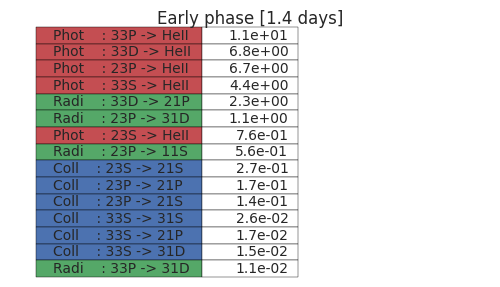

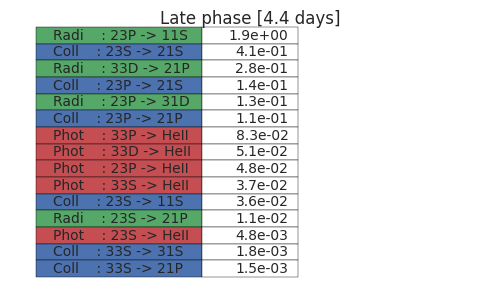

In [86]:
import networkx as nx
import NLTE.NLTE_model
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator


import networkx as nx
import NLTE.NLTE_model
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.style.use('seaborn-v0_8')

print_count = 15
for environment, title in zip(environments, ["Early phase [1.4 days]", "Late phase [4.4 days]"]):
        #plt.figure(figsize=(8,6))
        # make subplots with the second one being taller
        #fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8,6), gridspec_kw={'height_ratios': [1, 2.5, 1.5]})
        nlte_solver = NLTE.NLTE_model.NLTESolver(environment)
        nlte_solver.processes = nlte_solver.processes
        t, y = nlte_solver.solve(1e6)
        all_fluxes = [(process.get_transition_rate_matrix() * y.T[-1][None,:]) for process in nlte_solver.processes]
        all_fluxes = np.array(all_fluxes)#[:,~ortho_filter][:,:, ortho_filter]
        max_index = np.unravel_index(np.argsort(-all_fluxes, axis=None), all_fluxes.shape)
        i = 0
        table = []
        labels = []
        colors = []
        for process_idx, destination_idx, origin_idx in list(zip(*max_index)):
                #if states.all_names[origin_idx] in ["23S", "23P"] and not ortho_filter[destination_idx]:
                if ortho_filter[origin_idx] and not ortho_filter[destination_idx]:
                        i += 1
                        if i > print_count:
                                break
                        labels.append(f"{nlte_solver.processes[process_idx].name[:4]:8s}: {states.all_names[origin_idx]} -> {states.all_names[destination_idx]}")
                        table.append([f"{all_fluxes[process_idx, destination_idx, origin_idx]:1.1e}"])
                        colors.append(f"C{process_idx}")
        plt.figure(figsize=(6,4))
        plt.grid()
        plt.subplots_adjust(left=0.1, right=0.9, bottom=0.4, top=1)
        plt.axis("off")
        plt.title(title)
        the_table = plt.table(cellText=table, rowColours=colors, rowLabels=labels, loc='center', colWidths=[0.2, 0.2, 0.2, 0.2])
        plt.savefig(f"plots/transition_rates_{title}.png", bbox_inches="tight", dpi=300)

for process Collision the max flux into ortho states is 0.0010666232567787183, which is from state 21S to state 23S
for process Radiative the max flux into ortho states is 0.00013720291495572051, which is from state 31D to state 23P
for process Photoionization the max flux into ortho states is 0.0, which is from state 11S to state 23S
for process Recombination the max flux into ortho states is 34.56120579732671, which is from state HeII to state 23S
for process Hot electron ionization the max flux into ortho states is 0.0, which is from state 11S to state 23S


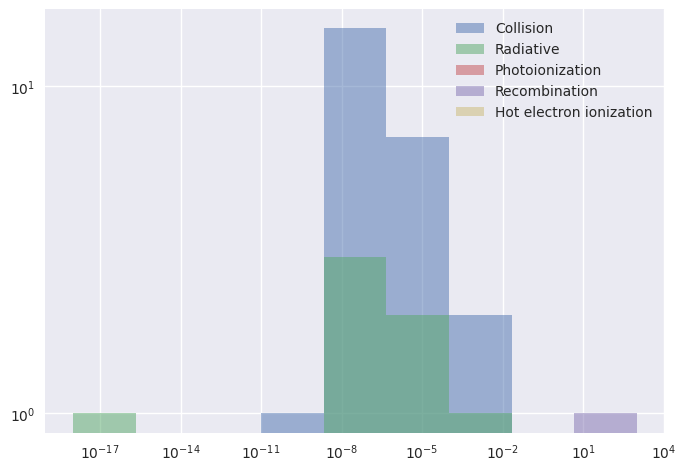

for process Collision the max flux out of ortho states is 0.26629228331300364, which is from state 23S to state 21S
for process Radiative the max flux out of ortho states is 2.3071910782167495, which is from state 33D to state 21P
for process Photoionization the max flux out of ortho states is 11.234371726769075, which is from state 33P to state HeII
for process Recombination the max flux out of ortho states is 0.0, which is from state 23S to state 11S
for process Hot electron ionization the max flux out of ortho states is 2.3146974682807048e-05, which is from state 23S to state HeII


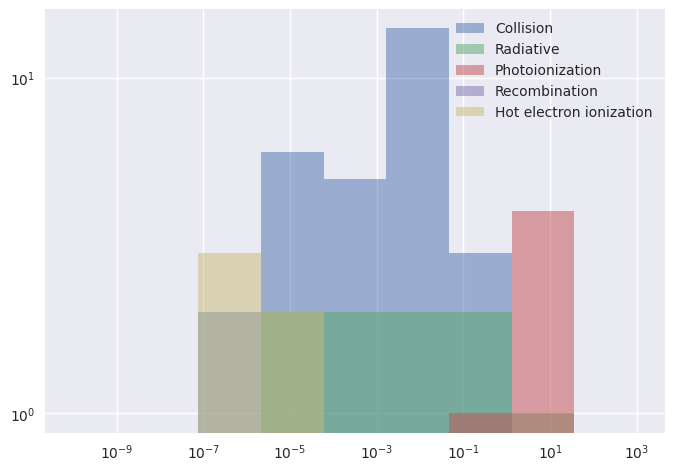

In [11]:
# make histogram of the flux sizes for each process
environment  = NLTE.NLTE_model.Environment(T_phot= 4400, photosphere_velocity= 0.245, line_velocity= 0.245, t_d=1.43)
nlte_solver = NLTE.NLTE_model.NLTESolver(environment)
#nlte_solver.processes = nlte_solver.processes[:2] + nlte_solver.processes[3:]
t, y = nlte_solver.solve(1000000)

ortho_states = np.array([name[1] == "3" for name in nlte_solver.states.all_names])
for process in nlte_solver.processes:
    fluxes =  process.get_transition_rate_matrix()* y.T[-1][None,:] 
    in_fluxes = fluxes[ortho_states, :][:, ~ortho_states]
    idx = np.unravel_index(np.argmax(in_fluxes), in_fluxes.shape)
    plt.hist(in_fluxes.flatten(), bins=np.geomspace(1e-18, 1000, 10), label=process.name, alpha=0.5, histtype="stepfilled")
    print(f"for process {process.name} the max flux into ortho states is {np.max(in_fluxes)}, which is from state {np.array(nlte_solver.states.all_names)[~ortho_states][idx[1]]} to state {np.array(nlte_solver.states.all_names)[ortho_states][idx[0]]}")

plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.show()
for process in nlte_solver.processes:
    fluxes =  process.get_transition_rate_matrix()* y.T[-1][None,:] 
    out_fluxes = fluxes[~ortho_states, :][:, ortho_states]
    idx = np.unravel_index(np.argmax(out_fluxes), out_fluxes.shape)
    plt.hist(out_fluxes.flatten(), bins=np.geomspace(1e-10, 1000, 10), label=process.name, alpha=0.5, histtype="stepfilled")
    print(f"for process {process.name} the max flux out of ortho states is {np.max(out_fluxes)}, which is from state {np.array(nlte_solver.states.all_names)[ortho_states][idx[1]]} to state {np.array(nlte_solver.states.all_names)[~ortho_states][idx[0]]}")
plt.legend()
plt.xscale("log")
plt.yscale("log")

/home/rasmus/.local/lib/python3.10/site-packages/astropy/units/quantity.py:666: RuntimeWarning: overflow encountered in expm1
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/rasmus/.local/lib/python3.10/site-packages/astropy/units/quantity.py:666: RuntimeWarning: overflow encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


53S,
 R=103503.74700369328,
 LTE pop: 1.761656325507962e-05
53P,
 R=322413.1211368099,
 LTE pop: 4.5476645510285486e-05
53F,
 R=151779.96720212008,
 LTE pop: 0.00010221214598846233
53D,
 R=256430.2184784581,
 LTE pop: 7.309473470621564e-05
53A,
 R=49361.153597481214,
 LTE pop: 0.00013137421933605194
43S,
 R=70902.7464847399,
 LTE pop: 4.7704588274753024e-05
43P,
 R=236340.37548158737,
 LTE pop: 0.00010565393082269495
43F,
 R=69738.34758614737,
 LTE pop: 0.00022914513082653346
43D,
 R=170591.72287779755,
 LTE pop: 0.00016403234078191136
33S,
 R=17168.956144965712,
 LTE pop: 0.000479878275890534
33P,
 R=78659.87864230057,
 LTE pop: 0.0006676808619992026
33D,
 R=44991.61649415416,
 LTE pop: 0.0009413462692994294
23S,
 R=34.50313378822811,
 LTE pop: 1.0000000000000027
23P,
 R=1048.6791890513987,
 LTE pop: 0.14346164067182304


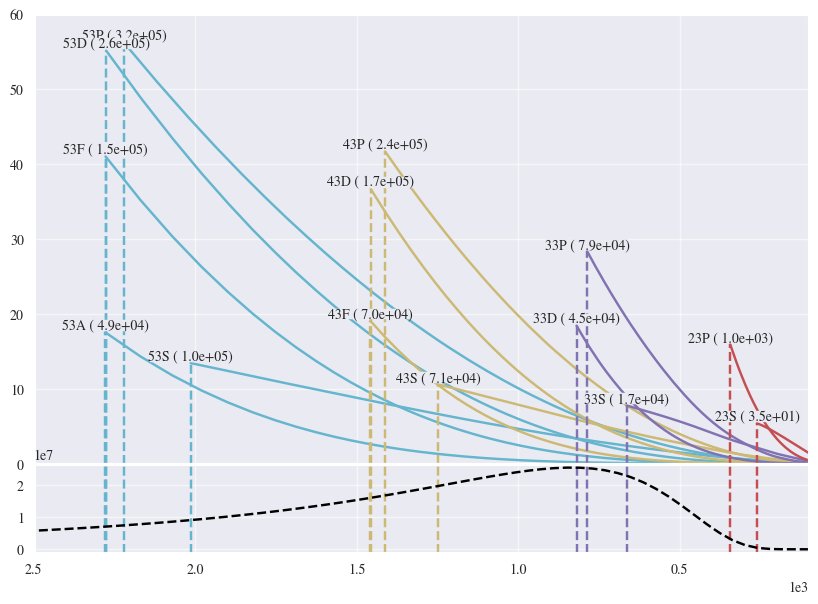

In [203]:
import NLTE.NLTE_model
ionization_rates = []
ionization_dict = NLTE.NLTE_model.get_ionization_dict()
spectrum = NLTE.NLTE_model.Environment().spectrum
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,7), sharex=True, height_ratios=[5, 1])
for state in reversed(sorted(ionization_dict.keys())):
    if not (state[0] in "12345" and state[1] == "3"):
        continue
    energies, crossection = ionization_dict[state]
    E = (energies * u.Ry).cgs
    nu = E.to(u.Hz, equivalencies=u.spectral()) 
    sigma = (crossection * u.Mbarn).cgs
    ionization_flux_article = u.sr * sigma
    x = E.to("nm", equivalencies=u.spectral()).value
    ax1.plot(x, crossection, label=state, color=f"C{state[0]}") 
    ax1.plot([x[0],x[0]], [0,crossection[0]], linestyle="--", color=f"C{state[0]}")
    ax2.axvline(x[[0]], linestyle="--", color=f"C{state[0]}")

    g = ("SPDFA".index(state[2])) *2 + 1
    lte_pop = g * np.exp(-(-E[0] + 0.3503019 * u.Ry)/(const.k_B*4400*u.K))
    ionization_flux_article = u.sr * sigma * (spectrum(nu)/E)
    #print(f"{state},\n R={np.trapz(x=nu, y=ionization_flux_article).to(1/u.s).value},\n LTE pop: {lte_pop.value}")
    ax1.text(x[[0]], crossection[0], f"{state} ({np.trapz(x=nu, y=ionization_flux_article).to(1/u.s).value: 1.1e})", 
             verticalalignment="bottom", horizontalalignment="center", fontsize=10,bbox=dict(facecolor=ax.get_facecolor(), edgecolor = ax.get_facecolor(), boxstyle='square,pad=-0.1'))


nm_range = np.linspace(100, 4000, 100) * u.nm
spectrum = BlackBody(4400 * u.K, scale=2*np.pi*u.Unit("erg/(s nm sr cm2)")) 
ax2.plot(nm_range, spectrum(nm_range)/nm_range.to("eV", equivalencies = u.spectral()), "--", color="black", alpha=1)
#spectrum = BlackBody(4400 * u.K, scale=2*np.pi*u.Unit("erg/(s nm sr cm2)")) 
#ax2.plot(nm_range, spectrum(nm_range)/nm_range.to("eV", equivalencies = u.spectral()), "--", color="black", alpha=1)

ax1.set_ylim(0, 6e1)
ax1.set_xlim(2500, 100)
plt.subplots_adjust(wspace=0, hspace=0)
#ax1.yscale("log")
# plot spectrum on right axis
#plt.yscale("log")
#plt.ylim(0, 1e-1)
plt.savefig("plots/ionization_crosssections.png", dpi=300, bbox_inches="tight")